In [1]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause


import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [86]:
rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 2)
y = np.sin(X[:,0])+np.cos(X[:,1]) + 2.

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = 5 * rng.rand(10000, 2)

In [60]:
# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

In [61]:
t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

/home/srharris/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVR complexity and bandwidth selected and model fitted in 0.291 s


/home/srharris/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

/home/srharris/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KRR complexity and bandwidth selected and model fitted in 0.182 s


/home/srharris/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [63]:
sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

Support vector ratio: 0.370


In [88]:
t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

SVR prediction for 10000 inputs in 0.024 s


In [89]:
t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

KRR prediction for 10000 inputs in 0.021 s


<IPython.core.display.Javascript object>


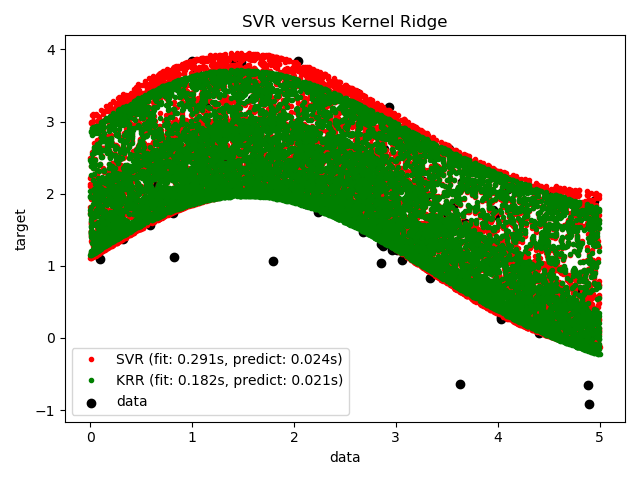

In [95]:
# Look at the results
fig,ax=plt.subplots()
sv_ind = svr.best_estimator_.support_
#ax.scatter(X[sv_ind,0], y[sv_ind], c='r', s=50, label='SVR support vectors',
            #zorder=2, edgecolors=(0, 0, 0))
ax.scatter(X[:100,0], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
ax.plot(X_plot[:,0], y_svr, 'r.',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
ax.plot(X_plot[:,0], y_kr, 'g.',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
ax.set_xlabel('data')
ax.set_ylabel('target')
ax.set_title('SVR versus Kernel Ridge')
ax.legend()
fig.tight_layout()

<IPython.core.display.Javascript object>


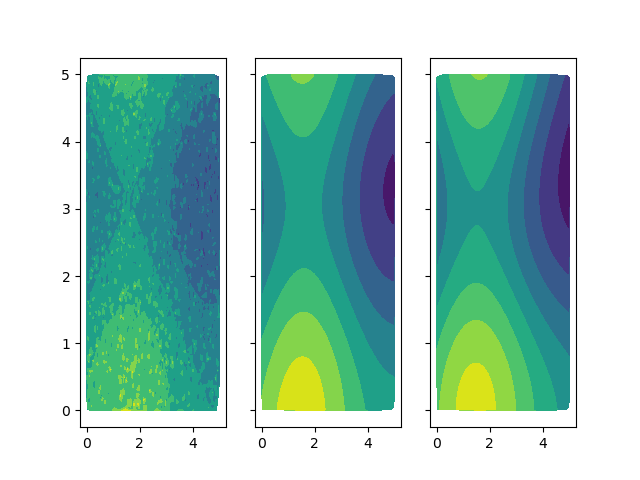

In [105]:
fig,[ax_orig,ax_svr,ax_kr]=plt.subplots(ncols=3,sharex=True,sharey=True)
ax_orig.tricontourf(X[:,0],X[:,1],y[:])
ax_svr.tricontourf(X_plot[:,0],X_plot[:,1],y_svr)
ax_kr.tricontourf(X_plot[:,0],X_plot[:,1],y_kr)

In [109]:
print(svr.score(X,y))
print(kr.score(X,y))

0.8530687859240739
0.8385378084860143


<IPython.core.display.Javascript object>


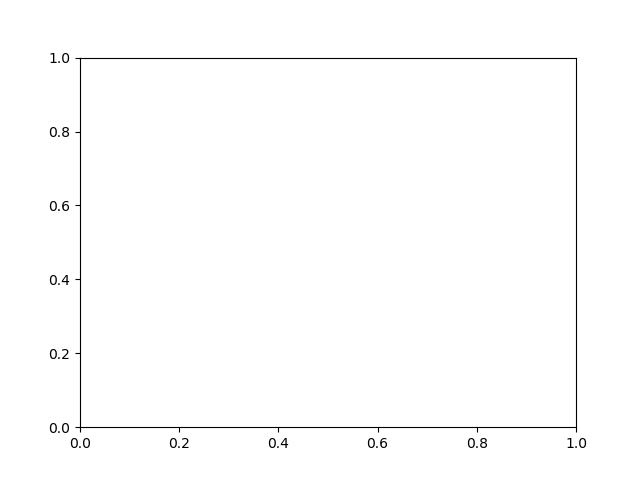

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 1

In [56]:
# Execution time
# Generate sample data
fig,ax=plt.subplots()
X = 5 * rng.rand(10000, 1)
y = np.sin(X[]).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    ax.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    ax.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Train size")
ax.set_ylabel("Time (seconds)")
ax.set_title('Execution Time')
ax.legend(loc="best")
fig.tight_layout()

<IPython.core.display.Javascript object>


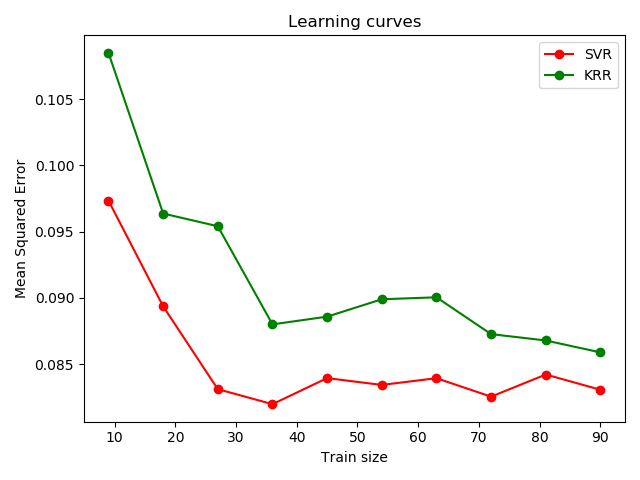

In [57]:
# Learning curves
fig,ax=plt.subplots()
svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

ax.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
ax.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
ax.set_xlabel("Train size")
ax.set_ylabel("Mean Squared Error")
ax.set_title('Learning curves')
ax.legend(loc="best")
fig.tight_layout()